In [1]:
import pandas as pd
import numpy as np
from itertools import product
from ast import literal_eval
import seaborn as sns
import random
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [2]:
fund_dt=pd.read_csv("..//..//..//data//Data//RawData//select_fund_details.csv",
                    encoding='utf-16',error_bad_lines=False, warn_bad_lines=False,sep=";")
fund_dt.head()

,ID_Art,author_country,fund_Country,Pb_Year,Code_Revue,Code_Discipline,Cit_ALL,Cit_Rel_ALL,FIR_2,Code_Document,Nb_Adresse,Nb_Auteur,Nb_Page,Nb_Reference
0,61665282,China,['PEOPLES-R-CHINA'],2017,9503,99,0,",000",",135",1,1,1,6,16
1,61665340,Australia,['AUSTRALIA'],2017,8201,12,8,"1,318",",890",1,6,8,13,67
2,61665351,Australia,['AUSTRALIA'],2017,8201,12,6,",988",",890",1,4,8,14,61
3,61665355,Austria,"['USA', 'AUSTRIA']",2017,8201,12,2,",329",",890",1,3,5,12,34
4,61665379,United Kingdom,"['EU', 'SPAIN']",2017,21325,48,13,"2,533","1,282",1,5,15,9,34


In [3]:
nofund_dt=pd.read_csv("..//..//..//data//Data//RawData//non_funded_article_details.csv",
                    encoding='utf-16',error_bad_lines=False, warn_bad_lines=False,sep=";")
nofund_dt.head()

,ID_Art,Pb_year,Code_Discipline,author_country,Institution,Code_Document,Code_Journal,Nb_Page,Nb_Reference,Nb_Author,Cit_Rel_ALL,Cit_ALL,Journal_impact,count_org,count_org_country,co_credit,correspond_country
0,46286963,2011,12,Italy,UNIV-NAPLES-2,3,11313,19,51,4,",707",22,",371",3,2,True,United States
1,49298837,2012,49,Switzerland,SWISS-PARAPLEG-RES,1,1571,7,63,6,",907",11,"1,484",10,4,True,Pakistan
2,49453697,2012,51,United Kingdom,ST-GEORGES-UNIV-LONDON,1,10207,4,68,3,",824",19,",662",1,1,False,United Kingdom
3,45305551,2010,96,Germany,DESY,3,13891,40,243,1,",410",7,"6,934",1,1,False,Germany
4,57668512,2016,58,United States,CAROLINAS-MED-CTR,1,8073,9,41,7,"1,287",9,"1,450",6,2,True,Spain


In [4]:
pubs_author_funder = pd.read_csv("..//..//..//data//Data//DerivedData//CleanedRawData//pubs_author_funder.csv")
pubs_author_funder['author_country'] = pubs_author_funder['author_country'].apply(literal_eval)
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].apply(
    lambda x: literal_eval(x) if pd.notnull(x) else x)

/home/miaoli/conda/envs/funding/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
pubs_author_funder

,id,author_country,funder_country,discipline,year,rel_citation,citation
0,30507292,[Turkey],[Turkey],77,2009,0.485,6
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9
2,30574691,[Russia],[Russia],83,2009,0.312,4
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3
...,...,...,...,...,...,...,...
12759123,65301180,[Pakistan],NaN,89,2018,0.000,0
12759124,65301286,"[Singapore, Singapore]",NaN,44,2017,0.264,1
12759125,65301288,[Iran],NaN,96,2017,0.000,0
12759126,65301295,[Israel],NaN,96,2017,0.000,0


In [5]:
pubs_author_funder['funder_country'] = pubs_author_funder['funder_country'].fillna(0)
pubs_author_funder['funded']=pubs_author_funder['funder_country'].apply(
    lambda x: 1 if x!=0 else 0)
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,1
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1


In [6]:
pubs_author_funder['intcol']=pubs_author_funder['author_country'].apply(
    lambda x:1 if len(set(x))>1 else 0)
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded,intcol
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1,0
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1,1
2,30574691,[Russia],[Russia],83,2009,0.312,4,1,0
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,1,0
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1,1


In [7]:
pubs_author_funder['num_ins'] = pubs_author_funder['author_country'].apply(
    lambda x:len(x))
pubs_author_funder.head()

,id,author_country,funder_country,discipline,year,rel_citation,citation,funded,intcol,num_ins
0,30507292,[Turkey],[Turkey],77,2009,0.485,6,1,0,1
1,30574690,"[United States, France]","[United States, United States, United States, ...",83,2009,0.703,9,1,1,2
2,30574691,[Russia],[Russia],83,2009,0.312,4,1,0,1
3,30585095,"[Spain, Spain]","[Spain, Spain, Spain, Spain, Spain, Spain]",89,2009,0.137,1,1,0,2
4,30585097,"[Germany, Spain]",[Spain],89,2009,0.410,3,1,1,2


In [8]:
y = pubs_author_funder['rel_citation'].values

In [9]:
x = pubs_author_funder[['funded','intcol','num_ins']].values

In [10]:
x = sm.add_constant(x)

In [12]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                 7.153e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:57:42   Log-Likelihood:            -2.9072e+07
No. Observations:            12759128   AIC:                         5.814e+07
Df Residuals:                12759124   BIC:                         5.814e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6082      0.001    535.329      0.0

In [13]:
model = sm.OLS(y,x)
res=model.fit()
print(res.summary(xname=['constant','funded','IntColl','Num_inst']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                 7.153e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:58:00   Log-Likelihood:            -2.9072e+07
No. Observations:            12759128   AIC:                         5.814e+07
Df Residuals:                12759124   BIC:                         5.814e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.6082      0.001    535.329      0.0

Text(0, 0.5, 'residual')

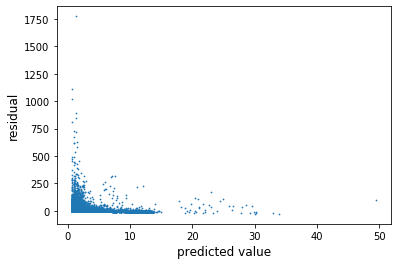

In [15]:
pred_val=res.fittedvalues
residual=y-pred_val
plt.scatter(pred_val,residual,s=0.5)
plt.xlabel("predicted value",fontsize=12)
plt.ylabel("residual",fontsize=12)